In [1]:
!pip install google_images_download

     |████████████████████████████████| 911kB 9.4MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=e7750b3f546dbd6e6e7e0981c69da780e7edcc3c03bb1e86b375657ca28a29c2
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
# del path

In [3]:
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"Steve Jobs, Elon musk","limit":80,"print_urls":True}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)


Item no.: 1 --> Item name = Steve Jobs
Evaluating...
Starting Download...
Image URL: https://www.biography.com/.image/t_share/MTY2MzU3OTcxMTUwODQxNTM1/steve-jobs--david-paul-morrisbloomberg-via-getty-images.jpg
Completed Image ====> 1.steve-jobs--david-paul-morrisbloomberg-via-getty-images.jpg
Image URL: https://images-na.ssl-images-amazon.com/images/I/81VStYnDGrL.jpg
Completed Image ====> 2.81VStYnDGrL.jpg
Image URL: https://cdn.vox-cdn.com/thumbor/WqMY2QINJvS9H0tqdrFBXsg2ghk=/0x86:706x557/1200x800/filters:focal(0x86:706x557)/cdn.vox-cdn.com/imported_assets/847184/stevejobs.png
Completed Image ====> 3.stevejobs.png
Image URL: https://cdn.britannica.com/04/171104-050-AEFE3141/Steve-Jobs-iPhone-2010.jpg
Completed Image ====> 4.Steve-Jobs-iPhone-2010.jpg
Image URL: https://specials-images.forbesimg.com/imageserve/5b8576db31358e0429c734e3/416x416.jpg?background=000000&cropX1=211&cropX2=2381&cropY1=900&cropY2=3072
Completed Image ====> 5.416x416.jpg
Image URL: https://image.cnbcfm.com/api

## Importing Vision Lib

In [0]:
from fastai.vision import *

In [0]:
path = Path('downloads')

folders = ['Steve Jobs', 'Elon musk']

for eachfolder in folders:
    dest = path/eachfolder
    dest.mkdir(parents = True, exist_ok = True)


In [0]:

#view data
data = ImageDataBunch.from_folder(path, train='.', valid_pct = 0.2, seed=66,
                                  ds_tfms = get_transforms(), size = 224).normalize(imagenet_stats)



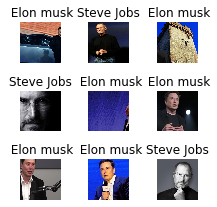

In [7]:
data.show_batch(rows = 3, figsize = (3,3))

In [8]:

print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

[' Elon musk', 'Steve Jobs']
128
32


## Start Training with Transfer Learning


In [9]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 30.1MB/s]


In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.166538,0.578261,0.250000,00:12
1,0.807990,0.312002,0.125000,00:09
2,0.602019,0.253776,0.062500,00:09
3,0.504460,0.242467,0.093750,00:09


In [0]:
# learn.recorder.plot_losses()

In [0]:
learn.save('stage-1')

## Interpertation

In [0]:
learn.load('stage-1');

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

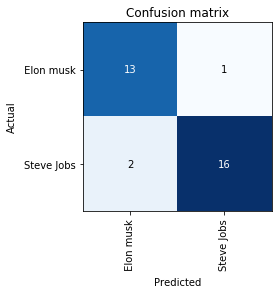

In [15]:
interp.plot_confusion_matrix()

#### As True Positive and True Negative are heigher we can relay on this model. and for that reason finalzing the stage-1 model here for this .

## Predicting

In [16]:
!ls
path

downloads  sample_data


PosixPath('downloads')

In [0]:
# For Test Image
learn.export()

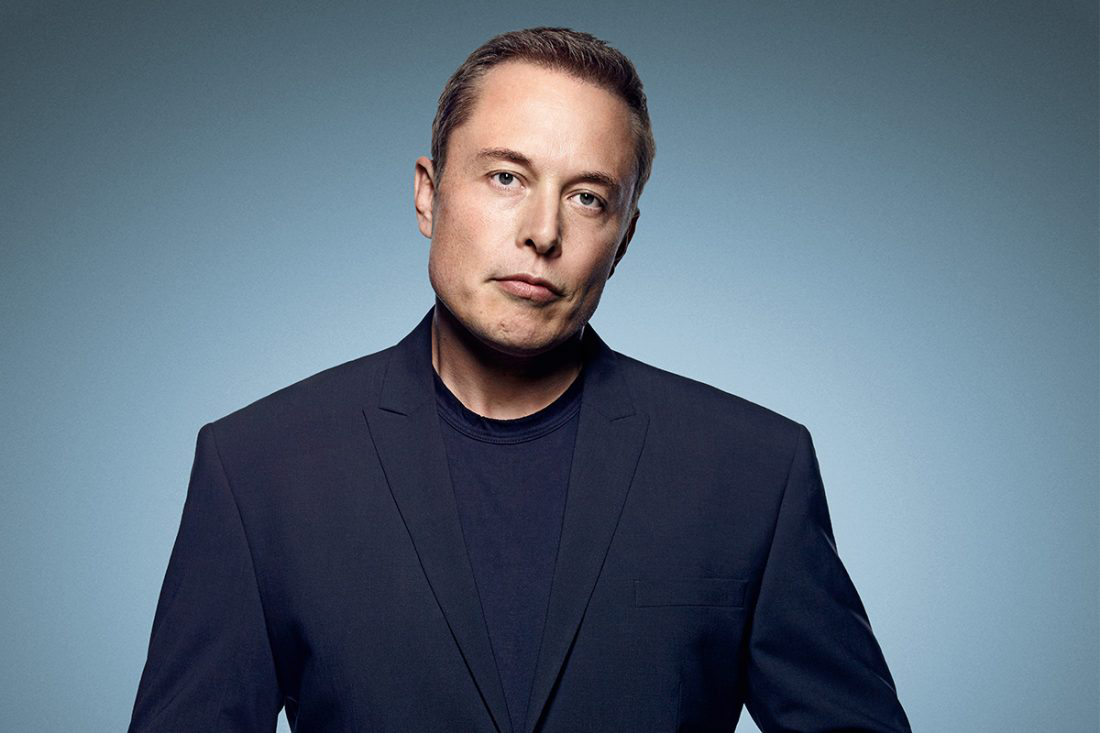

In [18]:
img = open_image('/content/downloads/ Elon musk/18.elon-musk-1100x733.jpg')
# /content/downloads/ Elon musk/18.elon-musk-1100x733.jpg
img

In [0]:
# learn = load_learner('/content/downloads/')


In [19]:
pred,idx,outputs = learn.predict(img)
print('Predicted class: ',pred)

Predicted class:   Elon musk
